In [129]:

import graphlab as gl


In [130]:

gedges = gl.SFrame.read_csv('edgesH.2.csv')

Finished parsing file /Users/amandamorrow/Documents/working/edgesH.2.csv

Parsing completed. Parsed 100 lines in 0.143259 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/amandamorrow/Documents/working/edgesH.2.csv

Parsing completed. Parsed 44534 lines in 0.037591 secs.

In [131]:
# Create graph
g = gl.SGraph()
g = g.add_vertices(vertices=gedges, vid_field='src')
g = g.add_edges(edges=gedges, src_field='src', dst_field='dst')
g = g.add_edges(edges=gedges, src_field='dst', dst_field='src')

In [26]:
pr = gl.pagerank.create(g)
pr.get('pagerank').topk(column_name='pagerank')

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 52979.5               |

| 2         | 44809.1               |

| 3         | 37902.4               |

| 4         | 31995.9               |

| 5         | 27014.2               |

| 6         | 22775                 |

| 7         | 19204                 |

| 8         | 16176.3               |

| 9         | 13627.9               |

| 10        | 11472.6               |

| 11        | 9659.36               |

| 12        | 8128.52               |

| 13        | 6840.96               |

| 14        | 5755.27               |

| 15        | 4842.26               |

| 16        | 4073.05               |

| 17        | 3426.24               |

| 18        | 2881.63               |

| 19        | 2423.69               |

| 20        | 2038.28               |

+-----------+-----------------------+

__id,pagerank,delta
10168082,11390.7365588,765.131972302
15757578,280.382153589,26.9200780757
34694337,185.861867928,17.7656652876
18089606,184.568349558,17.4025579678
398886217,173.090080495,16.04093489
19346335,92.4130867616,9.13152558492
520497278,82.3743282922,8.17270663519
264501955,79.8604564943,7.74029965676
2485417855,79.4005260603,8.43780978879
1917591078,64.7864861027,6.77453590621


In [14]:
# Visualize graph?
gl.canvas.set_target('browser')
g.show(vlabel="src")

Canvas is accessible via web browser at the URL: http://localhost:50890/index.html
Opening Canvas in default web browser.


In [15]:
from igraph import *

# Create empty graph
twitter_graph = Graph(directed=False)


In [67]:
# Setup the nodes
for src in gedges:
    if isinstance(src, int):
        twitter_graph.add_vertex(name=str(src))

In [81]:
# Setup the edges

for dst in gedges:
    if isinstance(src, int):
        twitter_graph.add_edge(str(dst), str(src))
        

In [52]:
from sklearn.neighbors import NearestNeighbors as NN
import pandas as pd
df = pd.read_csv('edgesH.2.csv')

In [53]:

model = NN(n_neighbors=3,algorithm='ball_tree').fit(df)
distances, indices = model.kneighbors(df)

In [54]:
print (distances)

[[0.00000000e+00 1.29175734e+08 1.41764039e+08]
 [0.00000000e+00 1.26275410e+07 7.28545990e+07]
 [0.00000000e+00 2.33178008e+08 3.33725042e+08]
 ...
 [0.00000000e+00 2.67480000e+05 2.67480086e+05]
 [0.00000000e+00 2.14000000e+02 1.22000000e+03]
 [0.00000000e+00 1.22000000e+03 1.43400000e+03]]


In [55]:
#model = NN(n_neighbors=3,algorithm='ball_tree').fit(edges)
#distances, indices = model.kneighbors(X)

NameError: name 'edges' is not defined

In [65]:
from sklearn.cluster import KMeans as KM
kmodel= KM(n_clusters=5, random_state=0).fit(df)
kmodel.cluster_centers_

array([[9.29834478e+07, 5.56170797e+07],
       [4.07036129e+08, 4.63259462e+09],
       [1.63629124e+08, 2.13612386e+09],
       [1.10825678e+09, 1.65591054e+08],
       [2.93406389e+09, 3.11337921e+08]])

In [66]:
ind = 14560
print(df.iloc[ind]) 
print(kmodel.labels_[ind])

src    105931787
dst     10168082
Name: 14560, dtype: int64
0


In [64]:
# file-input.py
import pickle
bios = open('bios.pickle','r')
fileO = pickle.load(bios)
#message = bios.read()
#print(message)
#bios.close()



In [44]:
fileO

{807095: u'Where the conversation begins. Follow for breaking news, special reports, RTs of our journalists and more. Visit https://t.co/ghL9OoYKMM to share news tips.\nFor decades, kids played on toxic ball fields in Red Hook. Some were closed in 2012, more in 2015. Locals wonder wh\u2026 https://t.co/gDjncVU6vO',
 1367531: u'America\u2019s Strongest Primetime Lineup Anywhere! Follow America\'s #1 cable news network, delivering you breaking news, insightful analysis, and must-see videos.\n.@SecretaryAcosta: "The Trump economy has created, since his election, 3.2 million new jobs." https://t.co/Q8R3zAgUiH',
 7702542: u'Nationally syndicated radio host. Bestselling author. #2A advocate. Born for the storm. All opinions mine. \U0001f1fa\U0001f1f8\nWalking the floor at #NRAAM! Stopping by @keltecweapons @patriotmobile @blckriflecoffee ! I\u2019ll be at the NRA booth\u2026 https://t.co/RJQw5gyOkN',
 10168082: u'A think tank devoted to the principles of free enterprise, limited government, 

In [24]:
kmodel.labels_[list(df['src']).index(807095)]

1

In [50]:
dataDF = pd.read_csv('./H100.csv', converters={'node':int})

In [108]:

    
for item in dataDF['node']:
   print item, kmodel.labels_[list(df['src']).index(item)], fileO[item]



15757578 1 President, Security Studies Group.    Former Army Special Forces Weapons, so expect precision fire.
#IranLied 
#ObamaLied
And pretty much everyone else involved in the #IranDeal did too

Good thread explaining this https://t.co/TdLpHuXHCw
18089606 1 Fragging the Niedermeyer of conformity like a boss. || Senior Columnist @Townhallcom | Author | Lawyer | Rebel | Army 11A COL(R) | #Bitey
The left wants Jews dead. https://t.co/lOT0jnVAdj
34694337 0 Social media strategist/reporter @dailycaller social media expert/writer @Democratslogic @unbiasedamerica editor in chief
I may be in the minority here, but I’m not all that impressed with “Mad Dog” Mattis, particularly on Iran. Prove me wrong.
398886217 0 Deputy Director, Digital Training @Leadershipinst. Contributor @CampusReform. Conservative. Denver Broncos fan. Chess fanatic. Views are my own.
RT @IvankaTrump: Our economic agenda is indisputably working and today's jobs numbers prove it! Unemployment fell to 3.9% for the first ti

112047805 1 Sr. Political Analyst, Fox News Channel. Arguments welcome. Name callers & verbal abusers blocked.
This brief interview should help you understand why @BretBaier is so popular. BTW, he gives me strokes, but I don’t… https://t.co/1d99orktXe
15976697 2 Little brown woman. Big mouth. Wife. Mom. Entrepreneur. Geek. #ManitouIncline addict. Host of #michellemalkininvestigates on CRTV. #freedanielholtzclaw
@PC1170 egad that sounds hellish. Like 7th circle of hell.
91882544 1 🎥 filmmaker. 📚 author. 🎤 speaker. My bestselling book "The Big Lie" exposes the Left's biggest lie yet: calling conservatives Nazis to hide their fascism.
RT @TheSilentLOUD: 💥 BOOM 💥 

GUILTY: Rosie O'Donnell exposed for exact same crime that saw Dinesh D’Souza sentenced  to

▪️5 yrs Probation…


In [72]:
import prettytable
pts = []


for item in set(dataDF):
    # Create a pretty table of tweet contents and any expanded urls
    pt = prettytable.PrettyTable(["ID", "Cluster ID", "Bio"])
    pt.align["Bio"] = "l" # Left align bio
    pt.max_width = 60 
    pt.padding_width = 1 # One space between column edges and contents (default)
    pts.append(pt)

In [93]:

for pt in pts:
    print pt

+----+------------+-----+
| ID | Cluster ID | Bio |
+----+------------+-----+
+----+------------+-----+


In [126]:
# Bigram Analysis

import string

import nltk
from nltk.collocations import *
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Stopwords common with twitter
my_stopwords = stopwords.words('english')
my_stopwords = my_stopwords + ['http', 'https', 'bit', 'ly', 'co', 'rt', 'rts', 'com', 'org', 'dot', 'go', 'via', 'follow', 'us', 'follow', 'retweet', 'also', 'run']

def preProcess(text):
    text = text.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    filtered_words = [w for w in tokens if not w in my_stopwords and not w.isdigit() and len(w) > 2]
    return " ".join(filtered_words)

def getBigrams(content, threshold=5):
    tokens = nltk.wordpunct_tokenize(preProcess(content))
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens)
    finder.apply_freq_filter(threshold)
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    return sorted([ (bigram, score) for (bigram, score) in scored ], key=lambda t: t[1], reverse=True)

In [132]:
data = pd.read_csv('./Book.csv')
print(data)

           id  clusteridx                                                bio  \
0      807095         1.0  Where the conversation begins. Follow for brea...   
1     1367531         1.0  America’s Strongest Primetime Lineup Anywhere!...   
2     7702542         1.0   Nationally syndicated radio host. Bestselling...   
3    15450996         1.0  A public policy research organization dedicate...   
4    15745368         1.0  US Senator for Florida. Follow @SenRubioPress ...   
5    15757578         1.0   President, Security Studies Group.    Former ...   
6    15976697         2.0   Little brown woman. Big mouth. Wife. Mom. Ent...   
7    17847906         0.0  Born USSR | raised Brooklyn. Columnist @nypost...   
8    17995040         1.0  RT @DeniseHalliganA: @AlphaAchillesX @benshapi...   
9    18089606         1.0  Fragging the Niedermeyer of conformity like a ...   
10   18141232         0.0  Features editor @taskandpurpose • Instructor @...   
11   18401723         0.0   Seth Morgan 

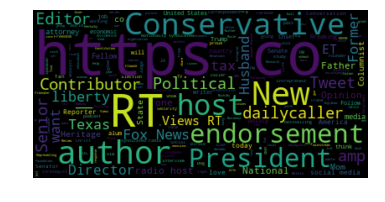

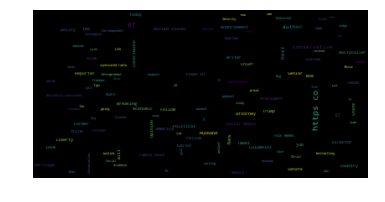

In [166]:
import csv
from wordcloud import WordCloud


#read first column of csv file to string of words seperated
#by tab

your_list = []
with open('./bio only.csv', 'rb') as f:
    reader = csv.reader(f)
    your_list = '\t'.join([i[0] for i in reader])


# Generate a word cloud image
wordcloud = WordCloud().generate(your_list)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=10).generate(your_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [162]:

bigrams = []

for clusteridx in data:
    getBigrams(data[clusteridx])

# Create a pretty table 
bigram_pt = prettytable.PrettyTable(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])
bigram_pt.align["Cluster 0"] = "l" 
bigram_pt.align["Cluster 1"] = "l" 
bigram_pt.align["Cluster 2"] = "l" 
bigram_pt.align["Cluster 3"] = "l"     
bigram_pt.max_width = 60 
bigram_pt.padding_width = 1 

for idx in range(len(bigrams[0])):
    bigram_pt.add_row([" ".join(bigram[idx][0]) for bigram in bigrams])


print bigram_pt

TypeError: 'builtin_function_or_method' object is not iterable